In [1]:
from utilities.proj1_helpers import load_csv_data

In [6]:
train_data = load_csv_data("data/train.csv")
y, x, ids = train_data[0], train_data[1], train_data[2]
N, D = x.shape
print(y.shape, x.shape, ids.shape)

(250000,) (250000, 30) (250000,)


In [7]:
test_data = load_csv_data("data/test.csv")
y_train, x_train, ids_train = train_data[0], train_data[1], train_data[2]

In [10]:
from utilities.implementations_Nico import *
from utilities.cross_validation import cross_validation, build_k_indices, split_data
#from utilities.pca import compute_pca
from utilities.preprocessing import standard_scaler

In [11]:
# Normalize and center the data
x = standard_scaler(x)

In [147]:
def compute_pca(x, number_pc=-1):
    N, D = np.shape(x)

    # Center the data
    g = np.mean(x, axis=0) # center of mass
    x_c = x - g
    
    # Spectral analysis
    Sigma = x_c.T.dot(x_c)
    values, vectors = np.linalg.eig(Sigma)
    values, vectors = zip(*sorted(zip(values, vectors), reverse=True)) # eigenvalues and eigenvectors sorted together in decreasing order
    values, vectors = np.array(values), np.array(vectors)
    
    # Selecting the principal components
    if number_pc < 0:
        rank = np.sum(values)
        sum_values = values[0]
        number_pc = 1
        print(sum_values/rank)
        while sum_values/rank < 0.95:
            sum_values += values[number_pc]
            number_pc += 1
            print(sum_values/rank)
    pc = x_c.dot(vectors[:,:number_pc])
    return pc, vectors[:number_pc], values[:number_pc]

In [148]:
pc, eigenvectors, eigenvalues = compute_pca(x)
print(pc.shape, "\n", eigenvectors.shape, "\n", eigenvalues.shape)

0.40890890462
0.487868208514
0.565114790544
0.631103462787
0.686611049091
0.738437741368
0.778676161446
0.816172511882
0.849723869869
0.879872943146
0.906051543435
0.927820189879
0.943795220053
0.958554421504
(250000, 14) 
 (14, 30) 
 (14,)


32.9 2500


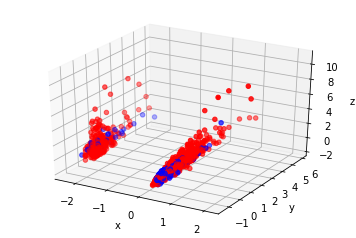

In [255]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_sub = x[::1000] # change x to pc to use the PCA
y_sub = y[::1000]

y_color = ['blue' if y_sub[i] > 0. else 'red' for i in range(len(y_sub))]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter3D(x_sub[y_sub > 0., 0], x_sub[y_sub > 0., 1], x_sub[y_sub > 0., 2], c='blue')
#ax.scatter3D(x_sub[y_sub < 0., 0], x_sub[y_sub < 0., 1], x_sub[y_sub < 0., 2], c='red')
ax.scatter3D(x_sub[:, 0], x_sub[:, 1], x_sub[:, 2], c=y_color)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()